Notebook used to generate figures 2B, 3, 4b, 4c of main text and supplemantal figure S2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.font_manager import FontProperties

import BootstrapFunctions as bsf
import glob

ibm_pal_rb = sns.blend_palette(['#648fff','#785ef0','#dc267f',],as_cmap=True)
ibm_full_list = ['#648fff','#785ef0','#dc267f','#fe6100','#ffb000','#000000','#ffffff']
category_palette = sns.color_palette(['#648fff','#785ef0','#dc267f',],as_cmap=True)
fontpath = '/Library/Fonts/TorontoSubwayLight.otf'
labelfont = FontProperties(fname=fontpath,size=10)
idx = pd.IndexSlice

In [2]:
sns.color_palette(ibm_full_list)

[(0.39215686274509803, 0.5607843137254902, 1.0),
 (0.47058823529411764, 0.3686274509803922, 0.9411764705882353),
 (0.8627450980392157, 0.14901960784313725, 0.4980392156862745),
 (0.996078431372549, 0.3803921568627451, 0.0),
 (1.0, 0.6901960784313725, 0.0),
 (0.0, 0.0, 0.0),
 (1.0, 1.0, 1.0)]

In [3]:
def colouring(fy,fx):
    return np.where((1-fx-fy<0)&(fx<1),'#785ef0',np.where((1-fx-fy<0)&(fx>1),'#B2A080',np.where(fy>0,'#dc267f',
             np.where(fy==0,'white',
                      np.where((fy<0)&(fx < 1),'#648fff',
                               np.where((fy<0)&(fx>1),'#ffb000','#000000'))))))

In [4]:
standard_perts = glob.glob('Data/*/*standard_form.csv',recursive=True)
bootres = [pd.read_csv(f,index_col=[0,1,2,3]) for f in standard_perts]
bootres = pd.concat(bootres)
bootres['avg colours'] = colouring(bootres['E[<F_y>]'],bootres['E[<F_x>]'])
bootres['at avg colours'] = colouring(bootres['F_y at avg'],bootres['F_x at avg'])
bootres = bootres.sort_values('E[<F_y>]',ascending=False,key=np.abs)

In [5]:
avg_posfy = bootres['E[<F_y>]']>0
avg_negfy = bootres['E[<F_y>]']<0
avg_nofy = bootres['E[<F_y>]']==0
avg_posviols = avg_posfy&((bootres['97.5% (rhoxy)']<bootres['E[CVx/CVy]'])&(bootres['E[rhoxy]']<bootres['2.5% (CVx/CVy)']))
avg_negviols = avg_negfy&((bootres['2.5% (rhoxy)']>bootres['E[CVx/CVy]'])&(bootres['E[rhoxy]']>bootres['97.5% (CVx/CVy)']))
avg_noviols = avg_nofy&~((bootres['E[rhoxy]'].between(bootres['2.5% (CVx/CVy)'],bootres['97.5% (CVx/CVy)']))|(bootres['E[CVx/CVy]'].between(bootres['2.5% (rhoxy)'],bootres['97.5% (rhoxy)'])))

at_posfy = bootres['F_y at avg']>0
at_negfy = bootres['F_y at avg']<0
at_nofy = bootres['F_y at avg']==0
at_posviols = at_posfy&((bootres['97.5% (rhoxy)']<bootres['E[CVx/CVy]'])&(bootres['E[rhoxy]']<bootres['2.5% (CVx/CVy)']))
at_negviols = at_negfy&((bootres['2.5% (rhoxy)']>bootres['E[CVx/CVy]'])&(bootres['E[rhoxy]']>bootres['97.5% (CVx/CVy)']))
at_noviols = at_nofy&~((bootres['E[rhoxy]'].between(bootres['2.5% (CVx/CVy)'],bootres['97.5% (CVx/CVy)']))|(bootres['E[CVx/CVy]'].between(bootres['2.5% (rhoxy)'],bootres['97.5% (rhoxy)'])))

bootres['fy avg violator'] = np.where(avg_posviols|avg_negviols|avg_noviols,1,0)
bootres['fy at avg violator'] = np.where(at_posviols|at_negviols|at_noviols,1,0)

avgfx_over1 = bootres['E[<F_x>]']>1
avgfx_lt1 = bootres['E[<F_x>]']<1
avgfx_1 = bootres['E[<F_x>]']== 1
avgfx_over1_viols = avgfx_over1&((bootres['97.5% (rhoxy)']<1/bootres['E[CVx/CVy]'])&(bootres['E[rhoxy]']<1/bootres['97.5% (CVx/CVy)']))
avgfx_lt1_viols = avgfx_lt1&((bootres['2.5% (rhoxy)']>1/bootres['E[CVx/CVy]'])&(bootres['E[rhoxy]']>1/bootres['2.5% (CVx/CVy)']))
avgfx_1_viols = avgfx_1&~((bootres['E[rhoxy]'].between(1/bootres['2.5% (CVx/CVy)'],1/bootres['97.5% (CVx/CVy)']))|(bootres['E[CVx/CVy]'].between(1/bootres['2.5% (rhoxy)'],1/bootres['97.5% (rhoxy)'])))

atavgfx_over1 = bootres['F_x at avg']>1
atavgfx_lt1 = bootres['F_x at avg']<1
atavgfx_1 = bootres['F_x at avg']==1
atavgfx_over1_viols = atavgfx_over1&((bootres['97.5% (rhoxy)']<1/bootres['E[CVx/CVy]'])&(bootres['E[rhoxy]']<1/bootres['97.5% (CVx/CVy)']))
atavgfx_lt1_viols = atavgfx_lt1&((bootres['2.5% (rhoxy)']>1/bootres['E[CVx/CVy]'])&(bootres['E[rhoxy]']>1/bootres['2.5% (CVx/CVy)']))
atavgfx_1_viols = atavgfx_1&~((bootres['E[rhoxy]'].between(1/bootres['2.5% (CVx/CVy)'],1/bootres['97.5% (CVx/CVy)']))|(bootres['E[CVx/CVy]'].between(1/bootres['2.5% (rhoxy)'],1/bootres['97.5% (rhoxy)'])))

bootres['fx at avg violator'] = np.where(atavgfx_over1_viols|atavgfx_lt1_viols|atavgfx_1_viols,1,0)
bootres['fx avg violator'] = np.where(avgfx_over1_viols|avgfx_lt1_viols|avgfx_1_viols,1,0)

In [6]:
consistent_fy_signs_avg = bootres['consistent fy signs (avg)'].isin([-27,0,27])
consistent_fx_signs_avg = bootres['consistent fx signs (avg)'].isin([-27,0,27])
consistent_fy_signs_atavg = bootres['consistent fy signs (at avg)'].isin([-27,0,27])
consistent_fx_signs_atavg = bootres['consistent fx signs (at avg)'].isin([-27,0,27])
consistent_res_avg = bootres[consistent_fy_signs_avg & consistent_fx_signs_avg]
consistent_res_atavg = bootres[consistent_fy_signs_atavg & consistent_fx_signs_atavg]
inconsistent_res_avg = bootres[~consistent_fy_signs_avg | ~consistent_fx_signs_avg]
inconsistent_res_atavg = bootres[~consistent_fy_signs_atavg | ~consistent_fx_signs_atavg]

<ErrorbarContainer object of 3 artists>

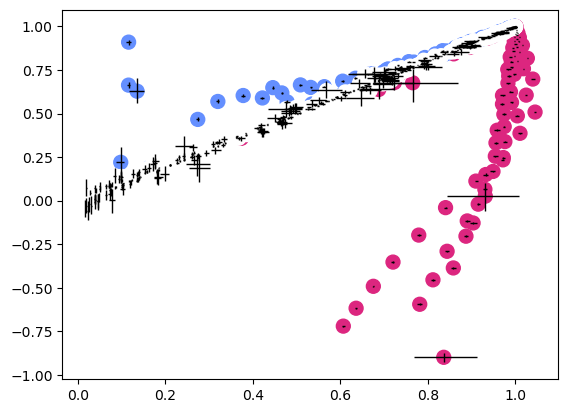

In [7]:
atavg_fy_violators = bootres[bootres['fy at avg violator']&consistent_fy_signs_atavg&consistent_fx_signs_atavg]
plt.scatter(atavg_fy_violators['E[CVx/CVy]'],atavg_fy_violators['E[rhoxy]'],c=atavg_fy_violators['at avg colours'],s=100)
plt.errorbar(atavg_fy_violators['E[CVx/CVy]'],atavg_fy_violators['E[rhoxy]'],
             xerr=[atavg_fy_violators['E[CVx/CVy]']-atavg_fy_violators['2.5% (CVx/CVy)'],
                   atavg_fy_violators['97.5% (CVx/CVy)']-atavg_fy_violators['E[CVx/CVy]']],
                   yerr=[atavg_fy_violators['E[rhoxy]']-atavg_fy_violators['2.5% (rhoxy)'],
                         atavg_fy_violators['97.5% (rhoxy)']-atavg_fy_violators['E[rhoxy]']],fmt='none',ecolor='black',elinewidth=1)

<ErrorbarContainer object of 3 artists>

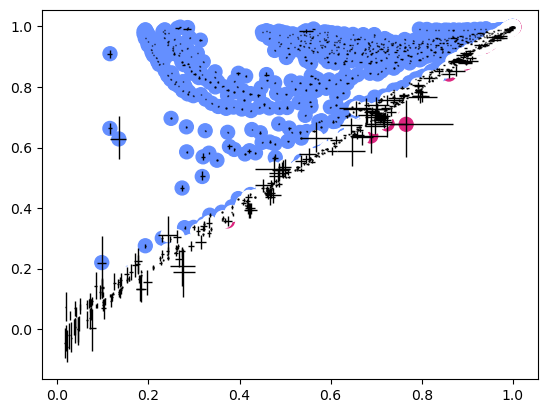

In [8]:
avgfyviolators = bootres[bootres['fy avg violator']&consistent_fy_signs_avg&consistent_fx_signs_avg]
plt.scatter(avgfyviolators['E[CVx/CVy]'],avgfyviolators['E[rhoxy]'],c=avgfyviolators['avg colours'],s=100)
plt.errorbar(avgfyviolators['E[CVx/CVy]'],avgfyviolators['E[rhoxy]'],
                xerr=[avgfyviolators['E[CVx/CVy]']-avgfyviolators['2.5% (CVx/CVy)'],
                    avgfyviolators['97.5% (CVx/CVy)']-avgfyviolators['E[CVx/CVy]']],
                    yerr=[avgfyviolators['E[rhoxy]']-avgfyviolators['2.5% (rhoxy)'],
                            avgfyviolators['97.5% (rhoxy)']-avgfyviolators['E[rhoxy]']],fmt='none',ecolor='black',elinewidth=1)


# Option 1: Show all dots on same rho CV plot. 
Two sub options: linear scales (with inset to show extent) or log x scale

(0.0, 4.0)

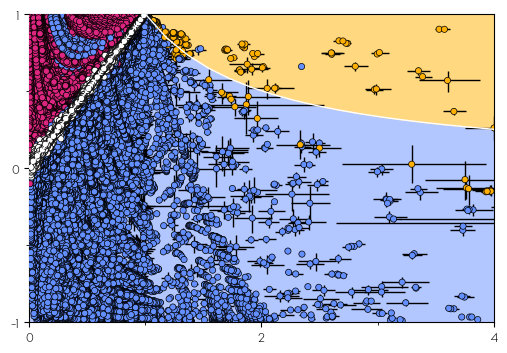

In [9]:
straightline = np.linspace(0,1)
curvedline = np.linspace(1,10)
f,ax = plt.subplots(1,1,figsize=(6,4))
ax.fill_between(straightline,straightline,1,color='#EE93BF')
ax.fill_between(np.concat((straightline,curvedline)),-1,np.concat((straightline,1/curvedline)),color='#B2C7FF')
ax.fill_between(curvedline,1/curvedline,1,color='#FFD880')

ax.scatter(consistent_res_avg['E[CVx/CVy]'],consistent_res_avg['E[rhoxy]'],
            c=consistent_res_avg['avg colours'],edgecolors='k',s=20,zorder=5,linewidths=0.5)
ax.errorbar(consistent_res_avg['E[CVx/CVy]'],consistent_res_avg['E[rhoxy]'],
             xerr=[consistent_res_avg['E[CVx/CVy]']-consistent_res_avg['2.5% (CVx/CVy)'],
                   consistent_res_avg['97.5% (CVx/CVy)']-consistent_res_avg['E[CVx/CVy]']],
             yerr=[consistent_res_avg['E[rhoxy]']-consistent_res_avg['2.5% (rhoxy)'],
                   consistent_res_avg['97.5% (rhoxy)']-consistent_res_avg['E[rhoxy]']],
             fmt='none',ecolor='k',elinewidth=1)
ax.plot(straightline,straightline,color='w',zorder=6,linewidth=1)
ax.plot(curvedline,1/curvedline,color='w',zorder=6,linewidth=1)

ax.set_yticks([-1,0,1])
ax.set_yticklabels(['-1','0','1'],fontproperties=labelfont)
ax.set_yticks([-0.5,0.5],minor=True)
ax.set_xticks([0,2,4])
ax.set_xticklabels(['0','2','4'],fontproperties=labelfont)
ax.set_xticks([1,3],minor=True)

ax.set_ylim(-1,1)
ax.set_xlim(0,4)

(4.0, 14.0)

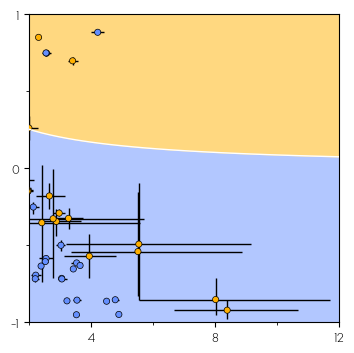

In [10]:
straightline = np.linspace(0,1)
curvedline = np.linspace(1,14)
f,ax = plt.subplots(1,1,figsize=(4,4))
ax.fill_between(straightline,straightline,1,color='#EE93BF')
ax.fill_between(np.concat((straightline,curvedline)),-1,np.concat((straightline,1/curvedline)),color='#B2C7FF')
ax.fill_between(curvedline,1/curvedline,1,color='#FFD880')

ax.scatter(consistent_res_avg['E[CVx/CVy]'],consistent_res_avg['E[rhoxy]'],
            c=consistent_res_avg['avg colours'],edgecolors='k',s=20,zorder=5,linewidths=0.5)
ax.errorbar(consistent_res_avg['E[CVx/CVy]'],consistent_res_avg['E[rhoxy]'],
             xerr=[consistent_res_avg['E[CVx/CVy]']-consistent_res_avg['2.5% (CVx/CVy)'],
                   consistent_res_avg['97.5% (CVx/CVy)']-consistent_res_avg['E[CVx/CVy]']],
             yerr=[consistent_res_avg['E[rhoxy]']-consistent_res_avg['2.5% (rhoxy)'],
                   consistent_res_avg['97.5% (rhoxy)']-consistent_res_avg['E[rhoxy]']],
             fmt='none',ecolor='k',elinewidth=1)
ax.plot(straightline,straightline,color='w',zorder=6,linewidth=1)
ax.plot(curvedline,1/curvedline,color='w',zorder=6,linewidth=1)

ax.set_yticks([-1,0,1])
ax.set_yticklabels(['-1','0','1'],fontproperties=labelfont)
ax.set_yticks([-0.5,0.5],minor=True)
ax.set_xticks([6,10,14])
ax.set_xticklabels(['4','8','12'],fontproperties=labelfont)
ax.set_xticks([4,8,12],minor=True)


ax.set_ylim(-1,1)
ax.set_xlim(4,14)

[Text(0.001, 0, '-3'),
 Text(0.01, 0, '-2'),
 Text(0.1, 0, '-1'),
 Text(1.0, 0, '0'),
 Text(10.0, 0, '1')]

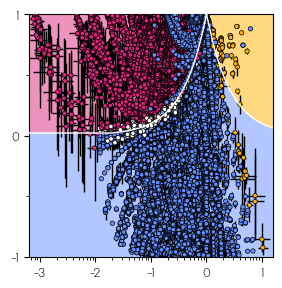

In [11]:
consistent_res_avg = consistent_res_avg.sort_values(['fy avg violator','E[<F_y>]'],ascending=[True,True],key=np.abs)
straightline = np.linspace(0,1)
curvedline = np.linspace(1,20)
f,ax = plt.subplots(1,1,figsize=(3.15,3.15))
ax.fill_between(straightline,straightline,1,color='#EE93BF')
ax.fill_between(np.concat((straightline,curvedline)),-1,np.concat((straightline,1/curvedline)),color='#B2C7FF')
ax.fill_between(curvedline,1/curvedline,1,color='#FFD880')

ax.scatter(consistent_res_avg['E[CVx/CVy]'],consistent_res_avg['E[rhoxy]'],
            c=consistent_res_avg['avg colours'],edgecolors='k',s=10,zorder=5,linewidths=0.5)
ax.errorbar(consistent_res_avg['E[CVx/CVy]'],consistent_res_avg['E[rhoxy]'],
             xerr=[consistent_res_avg['E[CVx/CVy]']-consistent_res_avg['2.5% (CVx/CVy)'],
                   consistent_res_avg['97.5% (CVx/CVy)']-consistent_res_avg['E[CVx/CVy]']],
             yerr=[consistent_res_avg['E[rhoxy]']-consistent_res_avg['2.5% (rhoxy)'],
                   consistent_res_avg['97.5% (rhoxy)']-consistent_res_avg['E[rhoxy]']],
             fmt='none',ecolor='k',elinewidth=1)
ax.plot(straightline,straightline,color='w',zorder=6,linewidth=1)
ax.plot(curvedline,1/curvedline,color='w',zorder=6,linewidth=1)

ax.set_yticks([-1,0,1])
ax.set_yticklabels(['-1','0','1'],fontproperties=labelfont)
ax.set_yticks([-0.5,0.5],minor=True)
ax.set_ylim(-1,1)

ax.set_xscale('log')
ax.set_xlim(10**-3.2,10**1.2)
ax.set_xticks([10**-3,10**-2,10**-1,10**0,10**1])
ax.set_xticklabels(['-3','-2','-1','0','1'],fontproperties=labelfont)

[Text(0.001, 0, '-3'),
 Text(0.01, 0, '-2'),
 Text(0.1, 0, '-1'),
 Text(1.0, 0, '0'),
 Text(10.0, 0, '1')]

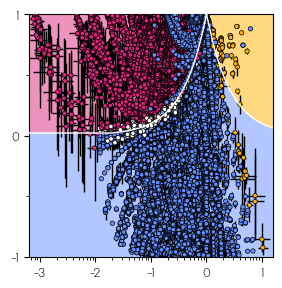

In [12]:
consistent_res_avg = consistent_res_avg.sort_values(['fy avg violator','E[<F_y>]'],ascending=[True,True],key=np.abs)
straightline = np.linspace(0,1)
curvedline = np.linspace(1,20)
f,ax = plt.subplots(1,1,figsize=(3.15,3.15))
ax.fill_between(straightline,straightline,1,color='#EE93BF')
ax.fill_between(np.concat((straightline,curvedline)),-1,np.concat((straightline,1/curvedline)),color='#B2C7FF')
ax.fill_between(curvedline,1/curvedline,1,color='#FFD880')

ax.scatter(consistent_res_avg['E[CVx/CVy]'],consistent_res_avg['E[rhoxy]'],
            c=consistent_res_avg['avg colours'],edgecolors='k',s=10,zorder=5,linewidths=0.5)
ax.errorbar(consistent_res_avg['E[CVx/CVy]'],consistent_res_avg['E[rhoxy]'],
             xerr=[consistent_res_avg['E[CVx/CVy]']-consistent_res_avg['2.5% (CVx/CVy)'],
                   consistent_res_avg['97.5% (CVx/CVy)']-consistent_res_avg['E[CVx/CVy]']],
             yerr=[consistent_res_avg['E[rhoxy]']-consistent_res_avg['2.5% (rhoxy)'],
                   consistent_res_avg['97.5% (rhoxy)']-consistent_res_avg['E[rhoxy]']],
             fmt='none',ecolor='k',elinewidth=1)
ax.plot(straightline,straightline,color='w',zorder=6,linewidth=1)
ax.plot(curvedline,1/curvedline,color='w',zorder=6,linewidth=1)

ax.set_yticks([-1,0,1])
ax.set_yticklabels(['-1','0','1'],fontproperties=labelfont)
ax.set_yticks([-0.5,0.5],minor=True)
ax.set_ylim(-1,1)

ax.set_xscale('log')
ax.set_xlim(10**-3.2,10**1.2)
ax.set_xticks([10**-3,10**-2,10**-1,10**0,10**1])
ax.set_xticklabels(['-3','-2','-1','0','1'],fontproperties=labelfont)

[Text(0.001, 0, '-3'),
 Text(0.01, 0, '-2'),
 Text(0.1, 0, '-1'),
 Text(1.0, 0, '0'),
 Text(10.0, 0, '1')]

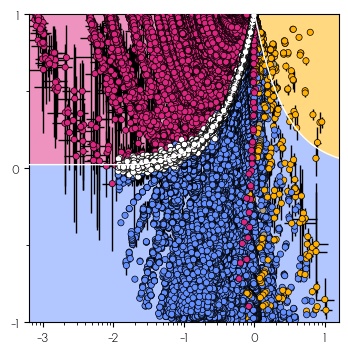

In [13]:
straightline = np.linspace(0,1)
curvedline = np.linspace(1,20)
f,ax = plt.subplots(1,1,figsize=(4,4))
ax.fill_between(straightline,straightline,1,color='#EE93BF')
ax.fill_between(np.concat((straightline,curvedline)),-1,np.concat((straightline,1/curvedline)),color='#B2C7FF')
ax.fill_between(curvedline,1/curvedline,1,color='#FFD880')

ax.scatter(consistent_res_atavg['E[CVx/CVy]'],consistent_res_atavg['E[rhoxy]'],
            c=consistent_res_atavg['at avg colours'],edgecolors='k',s=20,zorder=5,linewidths=0.5)
ax.errorbar(consistent_res_atavg['E[CVx/CVy]'],consistent_res_atavg['E[rhoxy]'],
             xerr=[consistent_res_atavg['E[CVx/CVy]']-consistent_res_atavg['2.5% (CVx/CVy)'],
                   consistent_res_atavg['97.5% (CVx/CVy)']-consistent_res_atavg['E[CVx/CVy]']],
             yerr=[consistent_res_atavg['E[rhoxy]']-consistent_res_atavg['2.5% (rhoxy)'],
                   consistent_res_atavg['97.5% (rhoxy)']-consistent_res_atavg['E[rhoxy]']],
             fmt='none',ecolor='k',elinewidth=1)
ax.plot(straightline,straightline,color='w',zorder=6,linewidth=1)
ax.plot(curvedline,1/curvedline,color='w',zorder=6,linewidth=1)

ax.set_yticks([-1,0,1])
ax.set_yticklabels(['-1','0','1'],fontproperties=labelfont)
ax.set_yticks([-0.5,0.5],minor=True)
ax.set_ylim(-1,1)

ax.set_xscale('log')
ax.set_xlim(10**-3.2,10**1.2)
ax.set_xticks([10**-3,10**-2,10**-1,10**0,10**1])
ax.set_xticklabels(['-3','-2','-1','0','1'],fontproperties=labelfont)

# Option 2: Three or four seperate plots with each class of system in one of them

(0.0, 10.0)

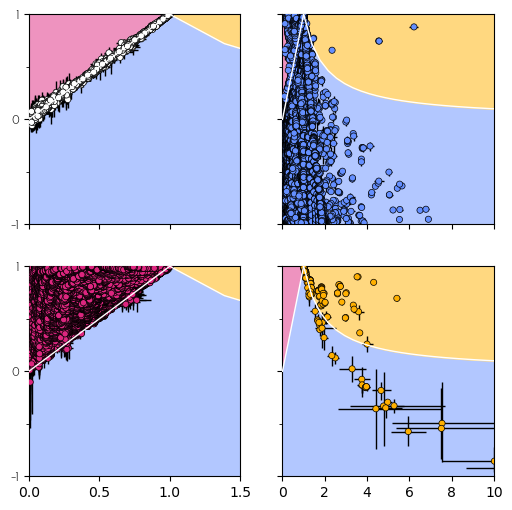

In [14]:
f,axs = plt.subplots(2,2,figsize=(6,6),sharey=True,sharex='col')
straightline = np.linspace(0,1)
curvedline = np.linspace(1,20)
groups = ['white','#648fff','#dc267f','#ffb000']
for i,ax in enumerate(axs.flatten()):
    ax.fill_between(straightline,straightline,1,color='#EE93BF')
    ax.fill_between(np.concat((straightline,curvedline)),-1,np.concat((straightline,1/curvedline)),color='#B2C7FF')
    ax.fill_between(curvedline,1/curvedline,1,color='#FFD880')
    ax.plot(straightline,straightline,color='w',zorder=6,linewidth=1)
    ax.plot(curvedline,1/curvedline,color='w',zorder=6,linewidth=1)
    to_plot = consistent_res_avg[consistent_res_avg['avg colours'].isin([groups[i]])]
    ax.scatter(to_plot['E[CVx/CVy]'],to_plot['E[rhoxy]'],
                c=to_plot['avg colours'],edgecolors='k',s=20,zorder=5,linewidths=0.5)
    ax.errorbar(to_plot['E[CVx/CVy]'],to_plot['E[rhoxy]'],
                 xerr=[to_plot['E[CVx/CVy]']-to_plot['2.5% (CVx/CVy)'],
                       to_plot['97.5% (CVx/CVy)']-to_plot['E[CVx/CVy]']],
                 yerr=[to_plot['E[rhoxy]']-to_plot['2.5% (rhoxy)'],
                       to_plot['97.5% (rhoxy)']-to_plot['E[rhoxy]']],
                 fmt='none',ecolor='k',elinewidth=1)
    ax.set_yticks([-1,0,1])
    ax.set_yticklabels(['-1','0','1'],fontproperties=labelfont)
    ax.set_yticks([-0.5,0.5],minor=True)
    ax.set_ylim(-1,1)

axs[1,0].set_xlim(0,1.5)
axs[1,1].set_xlim(0,10)

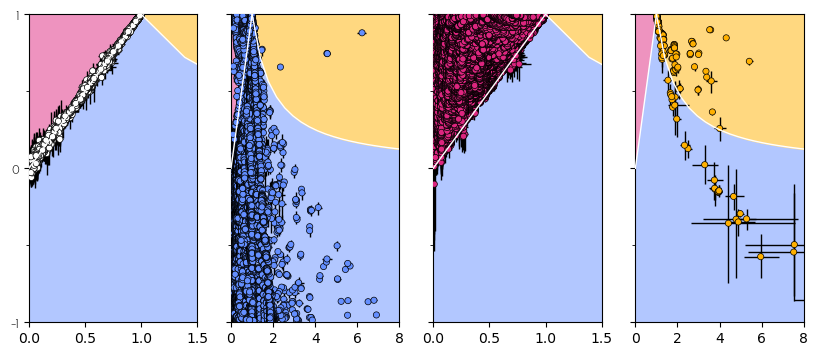

In [15]:
f,axs = plt.subplots(1,4,figsize=(10,4),sharey=True)
straightline = np.linspace(0,1)
curvedline = np.linspace(1,20)
xlims = [(0,1.5),(0,8),(0,1.5),(0,8)]
for i,ax in enumerate(axs.flatten()):
    ax.fill_between(straightline,straightline,1,color='#EE93BF')
    ax.fill_between(np.concat((straightline,curvedline)),-1,np.concat((straightline,1/curvedline)),color='#B2C7FF')
    ax.fill_between(curvedline,1/curvedline,1,color='#FFD880')
    ax.plot(straightline,straightline,color='w',zorder=6,linewidth=1)
    ax.plot(curvedline,1/curvedline,color='w',zorder=6,linewidth=1)
    to_plot = consistent_res_avg[consistent_res_avg['avg colours'].isin([groups[i]])]
    ax.scatter(to_plot['E[CVx/CVy]'],to_plot['E[rhoxy]'],
                c=to_plot['avg colours'],edgecolors='k',s=20,zorder=5,linewidths=0.5)
    ax.errorbar(to_plot['E[CVx/CVy]'],to_plot['E[rhoxy]'],
                 xerr=[to_plot['E[CVx/CVy]']-to_plot['2.5% (CVx/CVy)'],
                       to_plot['97.5% (CVx/CVy)']-to_plot['E[CVx/CVy]']],
                 yerr=[to_plot['E[rhoxy]']-to_plot['2.5% (rhoxy)'],
                       to_plot['97.5% (rhoxy)']-to_plot['E[rhoxy]']],
                 fmt='none',ecolor='k',elinewidth=1)
    ax.set_yticks([-1,0,1])
    ax.set_yticklabels(['-1','0','1'],fontproperties=labelfont)
    ax.set_yticks([-0.5,0.5],minor=True)
    ax.set_ylim(-1,1)
    ax.set_xlim(xlims[i])

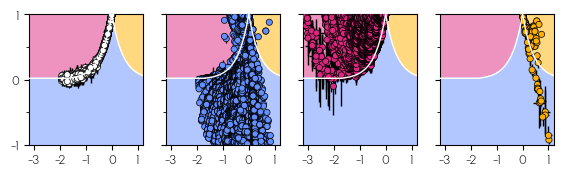

In [16]:
f,axs = plt.subplots(1,4,figsize=(17.2/2.54,(17.2/4)/2.54),sharey=True,sharex=True)
straightline = np.linspace(0,1)
curvedline = np.linspace(1,20)
for i,ax in enumerate(axs.flatten()):
    ax.fill_between(straightline,straightline,1,color='#EE93BF')
    ax.fill_between(np.concat((straightline,curvedline)),-1,np.concat((straightline,1/curvedline)),color='#B2C7FF')
    ax.fill_between(curvedline,1/curvedline,1,color='#FFD880')
    ax.plot(straightline,straightline,color='w',linestyle='-',zorder=6,linewidth=1)
    ax.plot(curvedline,1/curvedline,color='w',linestyle='-',zorder=6,linewidth=1)
    to_plot = consistent_res_avg[consistent_res_avg['avg colours'].isin([groups[i]])]
    ax.scatter(to_plot['E[CVx/CVy]'],to_plot['E[rhoxy]'],
                c=to_plot['avg colours'],edgecolors='k',s=20,zorder=5,linewidths=0.5)
    ax.errorbar(to_plot['E[CVx/CVy]'],to_plot['E[rhoxy]'],
                 xerr=[to_plot['E[CVx/CVy]']-to_plot['2.5% (CVx/CVy)'],
                       to_plot['97.5% (CVx/CVy)']-to_plot['E[CVx/CVy]']],
                 yerr=[to_plot['E[rhoxy]']-to_plot['2.5% (rhoxy)'],
                       to_plot['97.5% (rhoxy)']-to_plot['E[rhoxy]']],
                 fmt='none',ecolor='k',elinewidth=1)
    ax.set_xscale('log')
    ax.set_xlim(10**-3.2,10**1.2)
    ax.set_xticks([10**-3,10**-2,10**-1,10**0,10**1])
    ax.set_xticklabels(['-3','-2','-1','0','1'],fontproperties=labelfont)
    if i == 0:
      ax.set_yticks([-1,0,1])
      ax.set_yticklabels(['-1','0','1'],fontproperties=labelfont)
      ax.set_yticks([-0.5,0.5],minor=True)
      ax.set_ylim(-1,1)
#f.savefig('figures/July24/general_agreement_row.pdf',bbox_inches='tight')


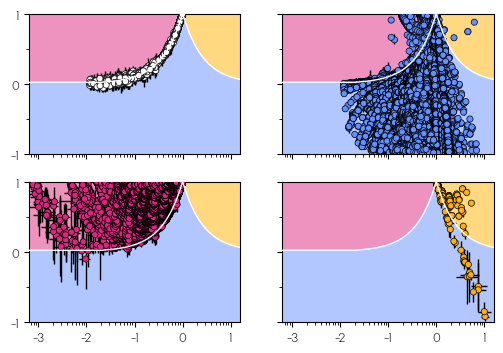

In [17]:
f,axs = plt.subplots(2,2,figsize=(6,4),sharey=True,sharex=True)
straightline = np.linspace(0,1)
curvedline = np.linspace(1,20)
for i,ax in enumerate(axs.flatten()):
    ax.fill_between(straightline,straightline,1,color='#EE93BF')
    ax.fill_between(np.concat((straightline,curvedline)),-1,np.concat((straightline,1/curvedline)),color='#B2C7FF')
    ax.fill_between(curvedline,1/curvedline,1,color='#FFD880')
    ax.plot(straightline,straightline,color='w',zorder=6,linewidth=1)
    ax.plot(curvedline,1/curvedline,color='w',zorder=6,linewidth=1)
    to_plot = consistent_res_avg[consistent_res_avg['avg colours'].isin([groups[i]])]
    ax.scatter(to_plot['E[CVx/CVy]'],to_plot['E[rhoxy]'],
                c=to_plot['avg colours'],edgecolors='k',s=20,zorder=5,linewidths=0.5)
    ax.errorbar(to_plot['E[CVx/CVy]'],to_plot['E[rhoxy]'],
                 xerr=[to_plot['E[CVx/CVy]']-to_plot['2.5% (CVx/CVy)'],
                       to_plot['97.5% (CVx/CVy)']-to_plot['E[CVx/CVy]']],
                 yerr=[to_plot['E[rhoxy]']-to_plot['2.5% (rhoxy)'],
                       to_plot['97.5% (rhoxy)']-to_plot['E[rhoxy]']],
                 fmt='none',ecolor='k',elinewidth=1)
    ax.set_yticks([-1,0,1])
    ax.set_yticklabels(['-1','0','1'],fontproperties=labelfont)
    ax.set_yticks([-0.5,0.5],minor=True)
    ax.set_ylim(-1,1)
    for ax in axs[1,:]:
        ax.set_xscale('log')
        ax.set_xlim(10**-3.2,10**1.2)
        ax.set_xticks([10**-3,10**-2,10**-1,10**0,10**1])
        ax.set_xticklabels(['-3','-2','-1','0','1'],fontproperties=labelfont)
#f.savefig('figures/July4/general_agreement_square.pdf',bbox_inches='tight')


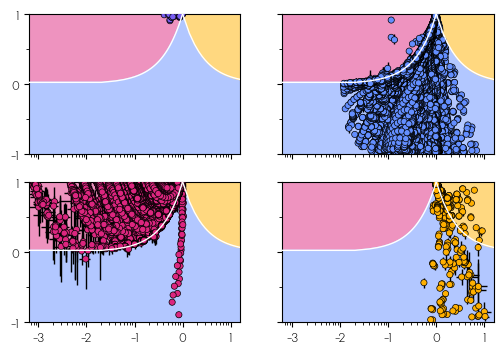

In [18]:
f,axs = plt.subplots(2,2,figsize=(6,4),sharey=True,sharex=True)
straightline = np.linspace(0,1)
curvedline = np.linspace(1,20)
groups = ['#785ef0','#648fff','#dc267f','#ffb000']
for i,ax in enumerate(axs.flatten()):
    ax.fill_between(straightline,straightline,1,color='#EE93BF')
    ax.fill_between(np.concat((straightline,curvedline)),-1,np.concat((straightline,1/curvedline)),color='#B2C7FF')
    ax.fill_between(curvedline,1/curvedline,1,color='#FFD880')
    ax.plot(straightline,straightline,color='w',zorder=6,linewidth=1)
    ax.plot(curvedline,1/curvedline,color='w',zorder=6,linewidth=1)
    to_plot = consistent_res_atavg[consistent_res_atavg['at avg colours'].isin([groups[i]])]
    ax.scatter(to_plot['E[CVx/CVy]'],to_plot['E[rhoxy]'],
                c=to_plot['at avg colours'],edgecolors='k',s=20,zorder=5,linewidths=0.5)
    ax.errorbar(to_plot['E[CVx/CVy]'],to_plot['E[rhoxy]'],
                 xerr=[to_plot['E[CVx/CVy]']-to_plot['2.5% (CVx/CVy)'],
                       to_plot['97.5% (CVx/CVy)']-to_plot['E[CVx/CVy]']],
                 yerr=[to_plot['E[rhoxy]']-to_plot['2.5% (rhoxy)'],
                       to_plot['97.5% (rhoxy)']-to_plot['E[rhoxy]']],
                 fmt='none',ecolor='k',elinewidth=1)
    ax.set_yticks([-1,0,1])
    ax.set_yticklabels(['-1','0','1'],fontproperties=labelfont)
    ax.set_yticks([-0.5,0.5],minor=True)
    ax.set_ylim(-1,1)
    for ax in axs[1,:]:
        ax.set_xscale('log')
        ax.set_xlim(10**-3.2,10**1.2)
        ax.set_xticks([10**-3,10**-2,10**-1,10**0,10**1])
        ax.set_xticklabels(['-3','-2','-1','0','1'],fontproperties=labelfont)


In [19]:
yellow_region_ex = bootres.loc[idx[:,:,:,'Data/BothFb_hardcoded/12-06 1232/system_14']]

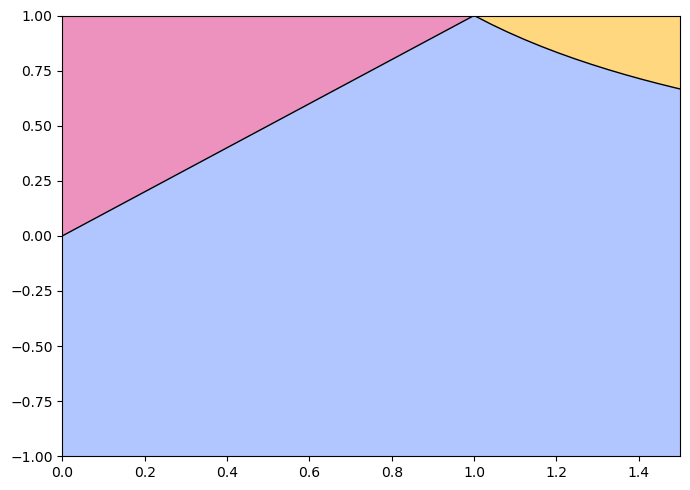

In [20]:
colours = ['w','k','darkgray']
from matplotlib.patches import Patch
f,ax = plt.subplots(figsize=(7,5))
straightline = np.linspace(0,1)
curvedline = np.linspace(1,3)
straightline = np.linspace(0,1)
curvedline = np.linspace(1,3)
ax.plot(straightline,straightline,color='k',linestyle='-',linewidth=1,alpha=1)
ax.plot(curvedline,1/curvedline,'-',color='k',linewidth=1,alpha=1)

#positiveprotein
ax.fill_between(straightline,straightline,1,facecolor='#dc267f',zorder=1,alpha=0.5)

#negproteinbelow

ax.fill_between(np.concatenate([straightline,curvedline]),
                  np.concatenate([straightline,1/curvedline]),
                  -1,facecolor='#648fff',zorder=1,alpha=0.5)



#negproteinabove
ax.fill_between(curvedline,1,1/curvedline,facecolor='#ffb000',zorder=1,alpha=0.5)
ax.set_xlim(0,1.5)
ax.set_ylim(-1,1)



f.tight_layout()

In [21]:
consistent_fx_signs_avg

fileN     fileda   filedb   sysname                                             
1.00000   0.01000  0.01000  Data/IntHill_randomstart_highfx/12-22 1559/system_1     True
2.66100   0.01000  0.01631  Data/IntHill_randomstart_highfx/12-22 1559/system_1     True
0.37580   0.02661  0.01631  Data/IntHill_randomstart_highfx/12-22 1559/system_1     True
0.14130   0.02661  0.01000  Data/IntHill_randomstart_highfx/12-22 1559/system_1     True
18.84000  0.01000  0.04340  Data/IntHill_randomstart_highfx/12-22 1559/system_1     True
                                                                                    ... 
0.07356   0.26100  0.07079  Data/BothFb_Nothardcoded_allfb/12-07 1414/system_188    True
0.27120   0.01920  0.01000  Data/BothFb_Nothardcoded_allfb/12-07 1414/system_188    True
0.01995   0.26100  0.03687  Data/BothFb_Nothardcoded_allfb/12-07 1414/system_188    True
13.59000  0.01000  0.03687  Data/BothFb_Nothardcoded_allfb/12-07 1414/system_188    True
1.00000   0.26100  0.26100  D

In [22]:
bootres[consistent_fx_signs_avg&consistent_fy_signs_avg&(bootres['E[<F_y>]']<0)&(bootres['E[<F_x>]']>1)].groupby('sysname').count()

,E[rhoxy],E[CVx/CVy],E[<x>],E[<y>],E[<F_x>],E[<F_y>],97.5% (rhoxy),2.5% (rhoxy),97.5% (CVx/CVy),2.5% (CVx/CVy),...,consistent fy signs (avg),consistent fy signs (at avg),consistent fx signs (avg),consistent fx signs (at avg),avg colours,at avg colours,fy avg violator,fy at avg violator,fx at avg violator,fx avg violator
sysname,,,,,,,,,,,,,,,,,,,,,
Data/BothFb_hardcoded/12-06 1232/system_10,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
Data/BothFb_hardcoded/12-06 1232/system_11,15,15,15,15,15,15,15,15,15,15,...,15,15,15,15,15,15,15,15,15,15
Data/BothFb_hardcoded/12-06 1232/system_13,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
Data/BothFb_hardcoded/12-06 1232/system_14,15,15,15,15,15,15,15,15,15,15,...,15,15,15,15,15,15,15,15,15,15
Data/BothFb_hardcoded/12-06 1232/system_4,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
Data/BothFb_hardcoded/12-06 1232/system_5,11,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11
Data/BothFb_hardcoded/12-06 1232/system_7,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
Data/BothFb_hardcoded/12-06 1232/system_8,14,14,14,14,14,14,14,14,14,14,...,14,14,14,14,14,14,14,14,14,14
Data/BothFb_hardcoded/12-06 1306/system_0,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8


In [23]:
in_posfy = (bootres['E[rhoxy]']>bootres['97.5% (CVx/CVy)'])|(bootres['E[CVx/CVy]']<bootres['2.5% (rhoxy)'])
in_negfy = (bootres['E[rhoxy]']<bootres['2.5% (CVx/CVy)'])|(bootres['E[CVx/CVy]']>bootres['97.5% (rhoxy)'])
in_fxgt1 = (bootres['E[rhoxy]']>1/bootres['2.5% (CVx/CVy)'])|(bootres['E[CVx/CVy]']<1/bootres['97.5% (rhoxy)'])
in_fxlt1 = (bootres['E[rhoxy]']<1/bootres['97.5% (CVx/CVy)'])|(bootres['E[CVx/CVy]']>1/bootres['2.5% (rhoxy)'])

<Axes: >

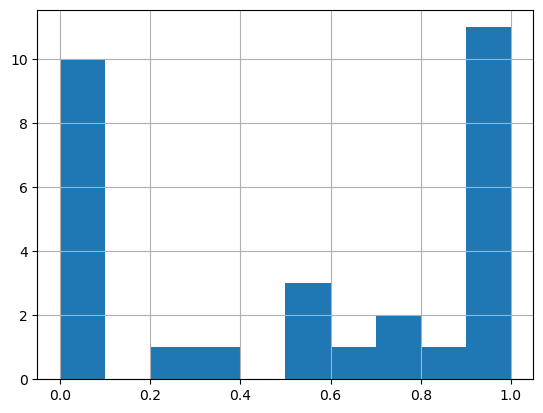

In [24]:
(in_fxgt1[(bootres['E[<F_x>]']>1)&consistent_fx_signs_avg].groupby(['sysname']).sum()/bootres[(bootres['E[<F_x>]']>1)&consistent_fx_signs_avg].groupby(['sysname'])['E[<F_x>]'].count()).hist()

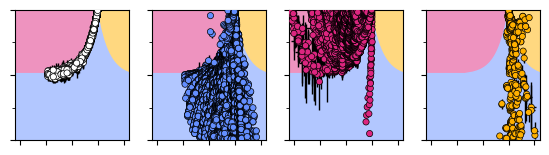

In [25]:
groups = ['white','#648fff','#dc267f','#ffb000']
f,axs = plt.subplots(1,4,figsize=(17.2/2.54,(17.2/4)/2.54),sharey=True,sharex=True)
straightline = np.linspace(0,1)
curvedline = np.linspace(1,20)
for i,ax in enumerate(axs.flatten()):
    ax.fill_between(straightline,straightline,1,color='#EE93BF')
    ax.fill_between(np.concat((straightline,curvedline)),-1,np.concat((straightline,1/curvedline)),color='#B2C7FF')
    ax.fill_between(curvedline,1/curvedline,1,color='#FFD880')
    #ax.plot(straightline,straightline,color='w',linestyle='-',zorder=6,linewidth=1)
    #ax.plot(curvedline,1/curvedline,color='w',linestyle='-',zorder=6,linewidth=1)
    to_plot = consistent_res_avg[consistent_res_avg['at avg colours'].isin([groups[i]])]
    ax.scatter(to_plot['E[CVx/CVy]'],to_plot['E[rhoxy]'],
                c=to_plot['at avg colours'],edgecolors='k',s=20,zorder=5,linewidths=0.5)
    ax.errorbar(to_plot['E[CVx/CVy]'],to_plot['E[rhoxy]'],
                 xerr=[to_plot['E[CVx/CVy]']-to_plot['2.5% (CVx/CVy)'],
                       to_plot['97.5% (CVx/CVy)']-to_plot['E[CVx/CVy]']],
                 yerr=[to_plot['E[rhoxy]']-to_plot['2.5% (rhoxy)'],
                       to_plot['97.5% (rhoxy)']-to_plot['E[rhoxy]']],
                 fmt='none',ecolor='k',elinewidth=1)
    ax.set_xscale('log')
    ax.set_xlim(10**-3.2,10**1.2)
    ax.set_xticks([10**-3,10**-2,10**-1,10**0,10**1])
    ax.set_xticklabels([],fontproperties=labelfont)
    if i == 0:
      ax.set_yticks([-1,0,1])
      ax.set_yticklabels([],fontproperties=labelfont)
      ax.set_yticks([-0.5,0.5],minor=True)
      ax.set_ylim(-1,1)
#f.savefig('figures/supplement/at_avg_row.png',dpi=1200,bbox_inches='tight')


(0.0, 1.1)

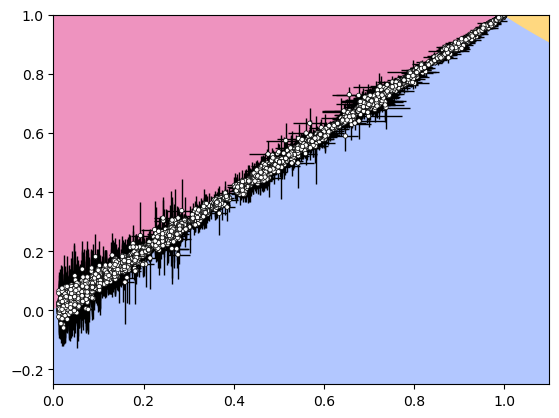

In [26]:
f,ax = plt.subplots()
curvedline = np.linspace(1,1.1)
to_plot = consistent_res_avg[consistent_res_avg['at avg colours'].isin(['white'])]
ax.fill_between(straightline,straightline,1,color='#EE93BF')
ax.fill_between(np.concat((straightline,curvedline)),-1,np.concat((straightline,1/curvedline)),color='#B2C7FF')
ax.fill_between(curvedline,1/curvedline,1,color='#FFD880')

ax.errorbar(to_plot['E[CVx/CVy]'],to_plot['E[rhoxy]'],
                xerr=[to_plot['E[CVx/CVy]']-to_plot['2.5% (CVx/CVy)'],
                    to_plot['97.5% (CVx/CVy)']-to_plot['E[CVx/CVy]']],
                    yerr=[to_plot['E[rhoxy]']-to_plot['2.5% (rhoxy)'],
                            to_plot['97.5% (rhoxy)']-to_plot['E[rhoxy]']],fmt='none',ecolor='black',elinewidth=1)
ax.scatter(to_plot['E[CVx/CVy]'],to_plot['E[rhoxy]'],c=to_plot['avg colours'],s=10,zorder=2,edgecolors='k',linewidths=0.5)
ax.set_ylim(-0.25,1)
ax.set_xlim(0,1.1)


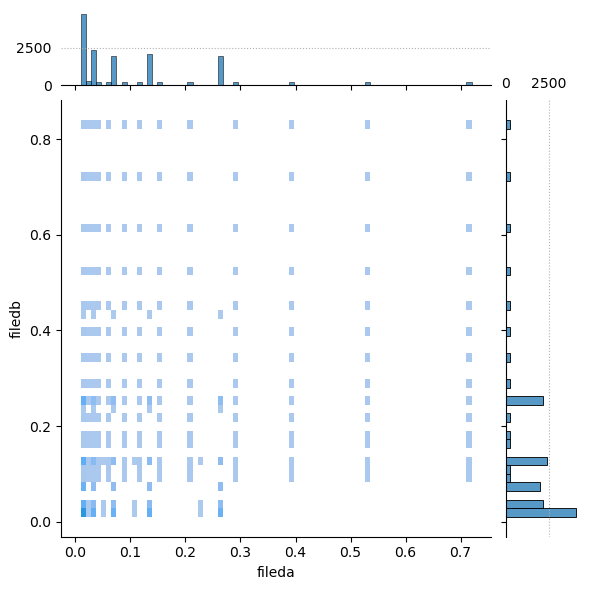

In [27]:
pertsizedat = to_plot.reset_index()
g = sns.jointplot(data=to_plot,x='fileda',y='filedb',kind='hist',vmin=0,vmax=3000)
g.ax_marg_y.tick_params(labeltop=True)
g.ax_marg_x.tick_params(labelleft=True)
g.ax_marg_y.grid(True, axis='x', ls=':')
g.ax_marg_x.grid(True, axis='y', ls=':')
plt.savefig('Data/pertsizes/nofeedback.pdf',bbox_inches='tight')

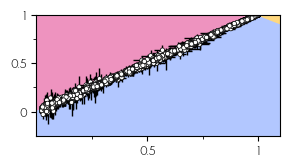

In [28]:
f,ax = plt.subplots(figsize=((8/2.54),(4/2.54)))
curvedline = np.linspace(1,1.1)
to_plot = consistent_res_avg[consistent_res_avg['at avg colours'].isin(['white'])&(consistent_res_avg['E[<F_x>]']!=0)]
ax.fill_between(straightline,straightline,1,color='#EE93BF')
ax.fill_between(np.concat((straightline,curvedline)),-1,np.concat((straightline,1/curvedline)),color='#B2C7FF')
ax.fill_between(curvedline,1/curvedline,1,color='#FFD880')

ax.errorbar(to_plot['E[CVx/CVy]'],to_plot['E[rhoxy]'],
                xerr=[to_plot['E[CVx/CVy]']-to_plot['2.5% (CVx/CVy)'],
                    to_plot['97.5% (CVx/CVy)']-to_plot['E[CVx/CVy]']],
                    yerr=[to_plot['E[rhoxy]']-to_plot['2.5% (rhoxy)'],
                            to_plot['97.5% (rhoxy)']-to_plot['E[rhoxy]']],fmt='none',ecolor='black',elinewidth=1)
ax.scatter(to_plot['E[CVx/CVy]'],to_plot['E[rhoxy]'],c=to_plot['avg colours'],s=10,zorder=2,edgecolors='k',linewidths=0.5)
ax.set_ylim(-0.25,1)
ax.set_xlim(0,1.1)
ax.set_yticks([0,0.5,1])
ax.set_yticklabels(['0','0.5','1'],fontproperties=labelfont)
ax.set_yticks([0.25,0.75],minor=True)
ax.set_xticks([0.5,1])
ax.set_xticklabels(['0.5','1'],fontproperties=labelfont)
ax.set_xticks([0.25,0.75],minor=True)
#f.savefig('figures/Dec4/nofbplot.pdf',bbox_inches='tight')

In [29]:
to_plot.index.get_level_values('sysname').unique()

Index(['Data/BothFb_Nothardcoded_allfb/12-07 1414/system_362',
       'Data/IntHill_randomstart_nofb/12-18 1218/system_4',
       'Data/BothFb_Nothardcoded_allfb/12-07 1414/system_752',
       'Data/BothFb_Nothardcoded_allfb/12-07 1414/system_765',
       'Data/IntHill_randomstart_nofb/12-18 1218/system_13',
       'Data/IntHill_randomstart_nofb/12-18 1218/system_5',
       'Data/BothFb_Nothardcoded_allfb/12-07 1414/system_567',
       'Data/BothFb_Nothardcoded_allfb/12-07 1414/system_938',
       'Data/BothFb_Nothardcoded_allfb/12-07 1414/system_963',
       'Data/IntHill_randomstart_nofb/12-18 1218/system_12',
       ...
       'Data/BothFb_Nothardcoded_allfb/12-07 1414/system_189',
       'Data/BothFb_Nothardcoded_allfb/12-07 1414/system_542',
       'Data/BothFb_Nothardcoded_allfb/12-07 1414/system_314',
       'Data/BothFb_Nothardcoded_allfb/12-07 1414/system_723',
       'Data/BothFb_Nothardcoded_allfb/12-07 1414/system_783',
       'Data/BothFb_Nothardcoded_allfb/12-07 1414/syst

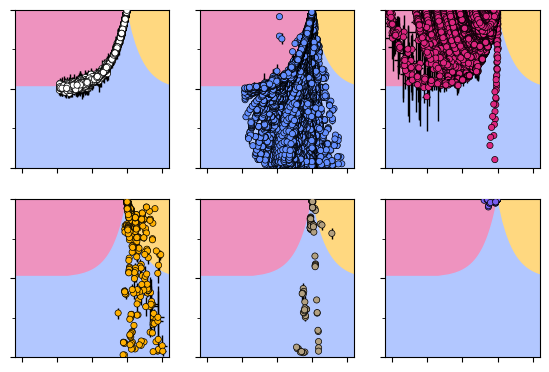

In [30]:
groups = ['white','#648fff','#dc267f','#ffb000','#B2A080',"#785ef0"]
f,axs = plt.subplots(2,3,figsize=(17.2/2.54,(17.2*2/3)/2.54),sharey=True,sharex=True)
straightline = np.linspace(0,1)
curvedline = np.linspace(1,20)
for i,ax in enumerate(axs.flatten()):
    ax.fill_between(straightline,straightline,1,color='#EE93BF')
    ax.fill_between(np.concat((straightline,curvedline)),-1,np.concat((straightline,1/curvedline)),color='#B2C7FF')
    ax.fill_between(curvedline,1/curvedline,1,color='#FFD880')
    to_plot = consistent_res_atavg[consistent_res_atavg['at avg colours'].isin([groups[i]])]
    ax.scatter(to_plot['E[CVx/CVy]'],to_plot['E[rhoxy]'],
                c=to_plot['at avg colours'],edgecolors='k',s=20,zorder=5,linewidths=0.5)
    ax.errorbar(to_plot['E[CVx/CVy]'],to_plot['E[rhoxy]'],
                 xerr=[to_plot['E[CVx/CVy]']-to_plot['2.5% (CVx/CVy)'],
                       to_plot['97.5% (CVx/CVy)']-to_plot['E[CVx/CVy]']],
                 yerr=[to_plot['E[rhoxy]']-to_plot['2.5% (rhoxy)'],
                       to_plot['97.5% (rhoxy)']-to_plot['E[rhoxy]']],
                 fmt='none',ecolor='k',elinewidth=1)
    ax.set_xscale('log')
    ax.set_xlim(10**-3.2,10**1.2)
    ax.set_xticks([10**-3,10**-2,10**-1,10**0,10**1])
    ax.set_xticklabels([],fontproperties=labelfont)
    if i == 0:
      ax.set_yticks([-1,0,1])
      ax.set_yticklabels([],fontproperties=labelfont)
      ax.set_yticks([-0.5,0.5],minor=True)
      ax.set_ylim(-1,1)
#f.savefig('figures/Nov14/alldots_atavg_withstabilityviols.png',dpi=1200,bbox_inches='tight')


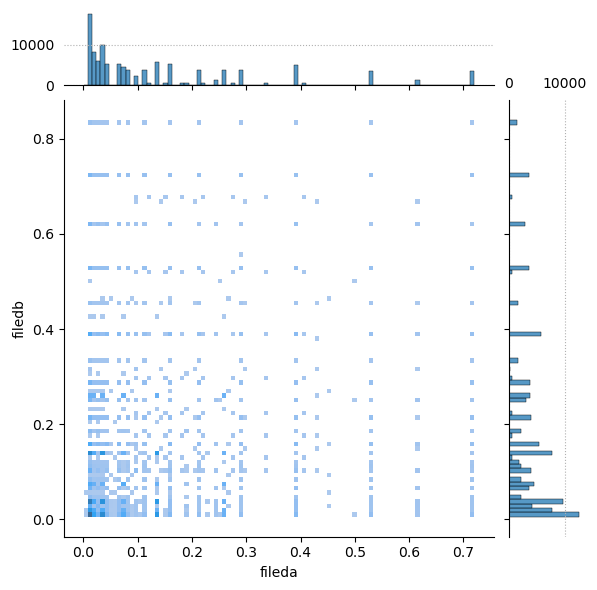

In [31]:
pertsizedat = to_plot.reset_index()
g = sns.jointplot(data=consistent_res_atavg[consistent_res_atavg['E[<F_y>]']!=0],x='fileda',y='filedb',kind='hist',vmin=0,vmax=3000)
g.ax_marg_y.tick_params(labeltop=True)
g.ax_marg_x.tick_params(labelleft=True)
g.ax_marg_y.grid(True, axis='x', ls=':')
g.ax_marg_x.grid(True, axis='y', ls=':')
plt.savefig('Data/pertsizes/at_average_proteinfb.pdf',bbox_inches='tight')

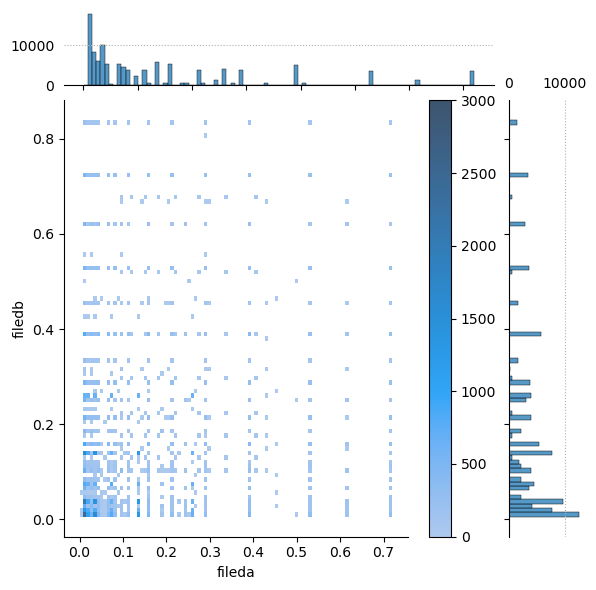

In [32]:
pertsizedat = to_plot.reset_index()
g = sns.jointplot(data=consistent_res_avg[consistent_res_avg['E[<F_y>]']!=0],x='fileda',y='filedb',kind='hist',vmin=0,vmax=3000,cbar=True)
g.ax_marg_y.tick_params(labeltop=True)
g.ax_marg_x.tick_params(labelleft=True)
g.ax_marg_y.grid(True, axis='x', ls=':')
g.ax_marg_x.grid(True, axis='y', ls=':')
plt.savefig('Data/pertsizes/average_proteinfb_cbar.pdf',bbox_inches='tight')

In [33]:
t = consistent_res_atavg[consistent_res_atavg['at avg colours'].isin(['#000000'])]
t['F_y at avg']

Series([], Name: F_y at avg, dtype: float64)

[Text(0.1, 0, '-1'), Text(1.0, 0, '0'), Text(10.0, 0, '1')]

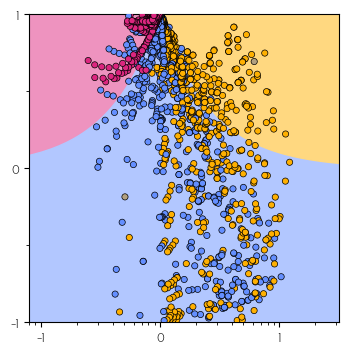

In [34]:
straightline = np.linspace(0,1)
curvedline = np.linspace(1,100,100)
f,ax = plt.subplots(1,1,figsize=(4,4))
ax.fill_between(straightline,straightline,1,color='#EE93BF')
ax.fill_between(np.concat((straightline,curvedline)),-1,np.concat((straightline,1/curvedline)),color='#B2C7FF')
ax.fill_between(curvedline,1/curvedline,1,color='#FFD880')

ax.scatter(inconsistent_res_atavg['E[CVx/CVy]'],inconsistent_res_atavg['E[rhoxy]'],
            c=inconsistent_res_atavg['at avg colours'],edgecolors='k',s=20,zorder=5,linewidths=0.5)
#ax.errorbar(inconsistent_res_atavg['E[CVx/CVy]'],inconsistent_res_atavg['E[rhoxy]'],
#             xerr=[inconsistent_res_atavg['E[CVx/CVy]']-inconsistent_res_atavg['2.5% (CVx/CVy)'],
#                   inconsistent_res_atavg['E[CVx/CVy]']],
#             yerr=[inconsistent_res_atavg['E[rhoxy]']-inconsistent_res_atavg['2.5% (rhoxy)'],
#                   inconsistent_res_atavg['97.5% (rhoxy)']-inconsistent_res_atavg['E[rhoxy]']],
#             fmt='none',ecolor='k',elinewidth=1)
#ax.plot(straightline,straightline,color='w',zorder=6,linewidth=1)
#ax.plot(curvedline,1/curvedline,color='w',zorder=6,linewidth=1)

ax.set_yticks([-1,0,1])
ax.set_yticklabels(['-1','0','1'],fontproperties=labelfont)
ax.set_yticks([-0.5,0.5],minor=True)
ax.set_ylim(-1,1)

ax.set_xscale('log')
ax.set_xlim(10**-1.1,10**1.5)
ax.set_xticks([10**-1,10**0,10**1])
ax.set_xticklabels(['-1','0','1'],fontproperties=labelfont)

[Text(0.1, 0, '-1'), Text(1.0, 0, '0'), Text(10.0, 0, '1')]

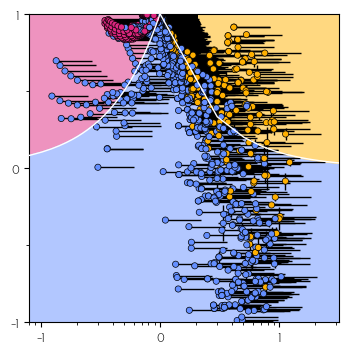

In [35]:
straightline = np.linspace(0,1)
curvedline = np.linspace(1,100)
f,ax = plt.subplots(1,1,figsize=(4,4))
ax.fill_between(straightline,straightline,1,color='#EE93BF')
ax.fill_between(np.concat((straightline,curvedline)),-1,np.concat((straightline,1/curvedline)),color='#B2C7FF')
ax.fill_between(curvedline,1/curvedline,1,color='#FFD880')
inconsistent_res_avg
ax.scatter(inconsistent_res_avg['E[CVx/CVy]'],inconsistent_res_avg['E[rhoxy]'],
            c=inconsistent_res_avg['avg colours'],edgecolors='k',s=20,zorder=5,linewidths=0.5)
ax.errorbar(inconsistent_res_avg['E[CVx/CVy]'],inconsistent_res_avg['E[rhoxy]'],
             xerr=[inconsistent_res_avg['E[CVx/CVy]']-inconsistent_res_avg['2.5% (CVx/CVy)'],
                   inconsistent_res_avg['E[CVx/CVy]']],
             yerr=[inconsistent_res_avg['E[rhoxy]']-inconsistent_res_avg['2.5% (rhoxy)'],
                   inconsistent_res_avg['97.5% (rhoxy)']-inconsistent_res_avg['E[rhoxy]']],
             fmt='none',ecolor='k',elinewidth=1)
ax.plot(straightline,straightline,color='w',zorder=6,linewidth=1)
ax.plot(curvedline,1/curvedline,color='w',zorder=6,linewidth=1)

ax.set_yticks([-1,0,1])
ax.set_yticklabels(['-1','0','1'],fontproperties=labelfont)
ax.set_yticks([-0.5,0.5],minor=True)
ax.set_ylim(-1,1)

ax.set_xscale('log')
ax.set_xlim(10**-1.1,10**1.5)
ax.set_xticks([10**-1,10**0,10**1])
ax.set_xticklabels(['-1','0','1'],fontproperties=labelfont)

In [36]:
((1-consistent_res_atavg['F_x at avg'] - consistent_res_atavg['F_y at avg']) <= 0).sum()

np.int64(145)

In [37]:
consistent_res_atavg[consistent_res_atavg['at avg colours']=='#B2A080']['F_y at avg']

fileN      fileda   filedb   sysname                                     
1.000000   0.03687  0.03687  Data/IntHill/12-12 1644/system_61              -0.729807
           0.01000  0.01000  Data/IntHill/12-12 1644/system_61              -0.712217
0.073560   0.03687  0.01000  Data/IntHill/12-12 1644/system_61              -0.728585
           0.13590  0.03687  Data/IntHill/12-12 1644/system_61              -0.907367
0.005412   0.13590  0.01000  Data/IntHill/12-12 1644/system_61              -0.905603
                                                                               ...   
13.590000  0.01000  0.03687  Data/BothFb_Nothardcoded/12-05 1153/system_2   -0.275650
1.000000   0.01000  0.01000  Data/BothFb_Nothardcoded/12-05 1153/system_2   -0.275485
3.687000   0.01000  0.01920  Data/BothFb_Nothardcoded/12-05 1153/system_2   -0.275486
1.000000   0.01920  0.01920  Data/BothFb_Nothardcoded/12-05 1153/system_2   -0.275633
0.271200   0.01920  0.01000  Data/BothFb_Nothardcoded/12-05 1153/s

In [38]:
sense_wrong = consistent_res_atavg[1-consistent_res_atavg['F_x at avg']-consistent_res_atavg['F_y at avg']<0]

In [39]:
sense_wrong_avg = consistent_res_avg[1-consistent_res_avg['E[<F_x>]']-consistent_res_avg['E[<F_y>]']<0]

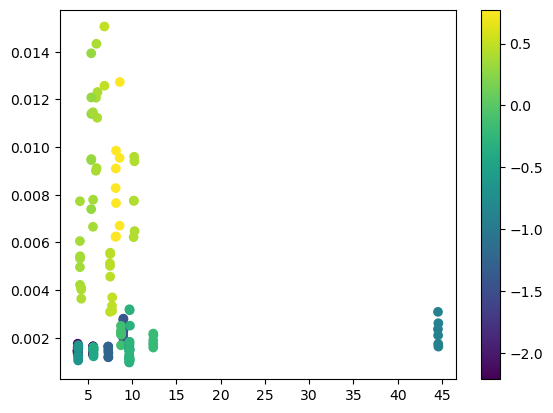

In [40]:
plt.scatter(sense_wrong['E[<x>]'],(sense_wrong['97.5% (<x>)']-sense_wrong['2.5% (<x>)'])/sense_wrong['E[<x>]'],
            c=1-sense_wrong['F_x at avg'])
plt.colorbar()

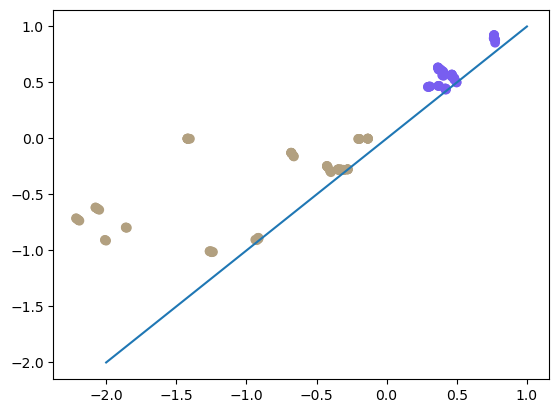

In [41]:
plt.scatter(1-sense_wrong['F_x at avg'],sense_wrong['F_y at avg'],
            c=sense_wrong['at avg colours'])
plt.plot(np.linspace(-2,1),np.linspace(-2,1))

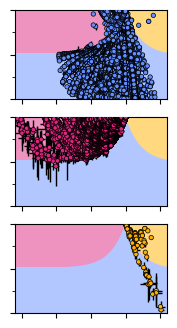

In [42]:
groups = ['#648fff','#dc267f','#ffb000']
f,axs = plt.subplots(3,1,figsize=(5/2.54,10/2.54),sharey=True,sharex=True)
straightline = np.linspace(0,1)
curvedline = np.linspace(1,20)
for i,ax in enumerate(axs.flatten()):
    ax.fill_between(straightline,straightline,1,color='#EE93BF')
    ax.fill_between(np.concat((straightline,curvedline)),-1,np.concat((straightline,1/curvedline)),color='#B2C7FF')
    ax.fill_between(curvedline,1/curvedline,1,color='#FFD880')
    to_plot = consistent_res_avg[consistent_res_avg['avg colours'].isin([groups[i]])]
    ax.scatter(to_plot['E[CVx/CVy]'],to_plot['E[rhoxy]'],
                c=to_plot['avg colours'],edgecolors='k',s=10,zorder=5,linewidths=0.5)
    ax.errorbar(to_plot['E[CVx/CVy]'],to_plot['E[rhoxy]'],
                 xerr=[to_plot['E[CVx/CVy]']-to_plot['2.5% (CVx/CVy)'],
                       to_plot['97.5% (CVx/CVy)']-to_plot['E[CVx/CVy]']],
                 yerr=[to_plot['E[rhoxy]']-to_plot['2.5% (rhoxy)'],
                       to_plot['97.5% (rhoxy)']-to_plot['E[rhoxy]']],
                 fmt='none',ecolor='k',elinewidth=1)
    ax.set_xscale('log')
    ax.set_xlim(10**-3.2,10**1.2)
    ax.set_xticks([10**-3,10**-2,10**-1,10**0,10**1])
    ax.set_xticklabels([],fontproperties=labelfont)
    if i == 0:
      ax.set_yticks([-1,0,1])
      ax.set_yticklabels([],fontproperties=labelfont)
      ax.set_yticks([-0.5,0.5],minor=True)
      ax.set_ylim(-1,1)
#f.savefig('figures/Nov14/alldots_avgsense_box.png',dpi=1200,bbox_inches='tight')


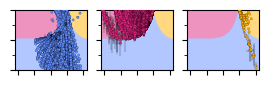

In [57]:
groups = ['#648fff','#dc267f','#ffb000']
f,axs = plt.subplots(1,3,figsize=(8/2.54,2/2.54),sharey=True,sharex=True)
straightline = np.linspace(0,1)
curvedline = np.linspace(1,20)
for i,ax in enumerate(axs.flatten()):
    ax.fill_between(straightline,straightline,1,color='#EE93BF')
    ax.fill_between(np.concat((straightline,curvedline)),-1,np.concat((straightline,1/curvedline)),color='#B2C7FF')
    ax.fill_between(curvedline,1/curvedline,1,color='#FFD880')
    to_plot = consistent_res_avg[consistent_res_avg['avg colours'].isin([groups[i]])]
    ax.scatter(to_plot['E[CVx/CVy]'],to_plot['E[rhoxy]'],
                c=to_plot['avg colours'],edgecolors='k',s=3,zorder=5,linewidths=0.1)
    ax.errorbar(to_plot['E[CVx/CVy]'],to_plot['E[rhoxy]'],
                 xerr=[to_plot['E[CVx/CVy]']-to_plot['2.5% (CVx/CVy)'],
                       to_plot['97.5% (CVx/CVy)']-to_plot['E[CVx/CVy]']],
                 yerr=[to_plot['E[rhoxy]']-to_plot['2.5% (rhoxy)'],
                       to_plot['97.5% (rhoxy)']-to_plot['E[rhoxy]']],
                 fmt='none',ecolor='k',elinewidth=0.2)
    ax.set_xscale('log')
    ax.set_xlim(10**-3.2,10**1.2)
    ax.set_xticks([10**-3,10**-2,10**-1,10**0,10**1])
    ax.set_xticklabels([],fontproperties=labelfont)
    if i == 0:
      ax.set_yticks([-1,0,1])
      ax.set_yticklabels([],fontproperties=labelfont)
      ax.set_yticks([-0.5,0.5],minor=True)
      ax.set_ylim(-1,1)
f.savefig('figures/ReviewerEdits/alldots_avgsense_row.png',dpi=1200,bbox_inches='tight')

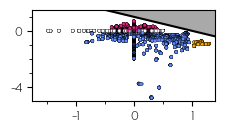

In [53]:


f,ax = plt.subplots(1,1,figsize=(6/2.54,3/2.54))
#ax.spines.left.set_position('zero')
#ax.spines.left.set_color('k')
#ax.spines.right.set_color('none')
#ax.spines.bottom.set_position('zero')
#ax.spines.bottom.set_color('k')
#ax.spines.top.set_color('none')
#ax.xaxis.set_ticks_position('bottom')
#ax.yaxis.set_ticks_position('left')


ax.scatter(consistent_res_avg['E[<F_x>]'],
            consistent_res_avg['E[<F_y>]'],
            c=consistent_res_avg['avg colours'],edgecolors='k',
            s=5,zorder=5,linewidths=0.2)
ax.plot(1-np.linspace(-3,2),np.linspace(-3,2),color='k',linestyle='-')
ax.fill_betweenx(np.linspace(-1,3),-np.linspace(-1,3)+1,2,color='darkgray')
ax.set_xlim(-1.75,1.4)
ax.set_ylim(-5,1.5)
ax.set_xticks([-1,0,1])
ax.set_xticklabels(['-1','0','1'],fontproperties=labelfont)
ax.set_xticks([-1.5,-0.5,0.5],minor=True)
ax.set_yticks([-4,0])
ax.set_yticklabels(['-4','0'],fontproperties=labelfont)
ax.set_yticks([-3,-2,-1,1],minor=True)
f.savefig('figures/ReviewerEdits/sensitivity_plot.png',dpi=1200,bbox_inches='tight')

In [45]:
consistent_both = consistent_res_avg.index.intersection(consistent_res_atavg.index)
differing_cats = consistent_res_avg.loc[consistent_both][consistent_res_avg.loc[consistent_both]['avg colours']!=consistent_res_atavg.loc[consistent_both]['at avg colours']].index

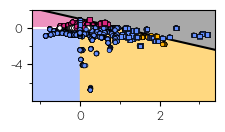

In [46]:
avg_fys = consistent_res_avg.loc[consistent_both]['E[<F_y>]']
avg_fxs = consistent_res_avg.loc[consistent_both]['E[<F_x>]']
atavg_fys = consistent_res_atavg.loc[consistent_both]['F_y at avg']
atavg_fxs = consistent_res_atavg.loc[consistent_both]['F_x at avg']

differing_avg_fys = consistent_res_avg.loc[differing_cats]['E[<F_y>]']
differing_avg_fxs = consistent_res_avg.loc[differing_cats]['E[<F_x>]']
differing_atavg_fys = consistent_res_atavg.loc[differing_cats]['F_y at avg']
differing_atavg_fxs = consistent_res_atavg.loc[differing_cats]['F_x at avg']

f,ax = plt.subplots(1,1,figsize=(6/2.54,3/2.54))
ax.scatter(atavg_fxs,atavg_fys,
           c=consistent_res_avg.loc[consistent_both]['avg colours'],edgecolors='k',s=10,zorder=5,linewidths=0.5)
ax.scatter(differing_atavg_fxs,differing_atavg_fys,
           c=consistent_res_avg.loc[differing_cats]['avg colours'],edgecolors='k',s=10,zorder=5,linewidths=0.5,marker='s')

ax.plot(np.linspace(-2,4),1-np.linspace(-2,4),color='k',linestyle='-')
ax.plot(np.linspace(-2,0.9),np.zeros(50),color='w',linestyle='-')

ax.fill_between(np.linspace(-2,4),1-np.linspace(-2,4),2,color='darkgray')
ax.fill_between(np.linspace(-2,0),-8,0,color='#B2C7FF',zorder=-1)
ax.fill_between(np.linspace(-2,0),0,1-np.linspace(-2,0),color='#EE93BF',zorder=-1)
ax.fill_between(np.linspace(0,4),np.ones(50)*-8,1-np.linspace(0,4),color='#FFD880',zorder=-1)
ax.set_ylim(-8,2)
ax.set_xlim(-1.2,3.4)
ax.set_xticks([0,2])
ax.set_xticklabels(['0','2'],fontproperties=labelfont)
ax.set_xticks([-1,1,3],minor=True)
ax.set_yticks([-4,0])
ax.set_yticklabels(['-4','0'],fontproperties=labelfont)
ax.set_yticks([-6,-2,2],minor=True)
f.savefig('figures/Dec4/sensitivity_plot_atavg.png',dpi=1200,bbox_inches='tight')

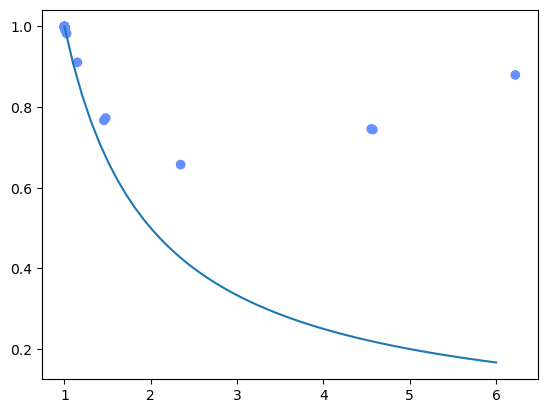

In [47]:
test = consistent_res_avg[(consistent_res_avg['avg colours']=='#648fff')&(consistent_res_avg['E[rhoxy]']>1/consistent_res_avg['E[CVx/CVy]'])]
plt.scatter(test['E[CVx/CVy]'],test['E[rhoxy]'],c=test['avg colours'])
plt.plot(np.linspace(1,6),1/np.linspace(1,6))

In [48]:
input_varg = bootres['Var[gamma]']/bootres['E[gamma]']**2

/var/folders/tm/37ds31ds14913tj9402vqksr0000gn/T/ipykernel_93811/387485658.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_plot['at avg colours'] = 'darkgrey'
/var/folders/tm/37ds31ds14913tj9402vqksr0000gn/T/ipykernel_93811/387485658.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_plot['at avg colours'] = 'darkgrey'


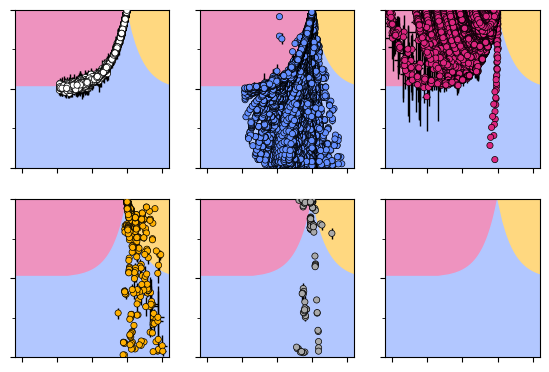

In [49]:
groups = ['white','#648fff','#dc267f','#ffb000','#B2A080',"#785ef0"]
f,axs = plt.subplots(2,3,figsize=(17.2/2.54,(17.2*2/3)/2.54),sharey=True,sharex=True)
straightline = np.linspace(0,1)
curvedline = np.linspace(1,20)
for i,ax in enumerate(axs.flatten()):
    ax.fill_between(straightline,straightline,1,color='#EE93BF')
    ax.fill_between(np.concat((straightline,curvedline)),-1,np.concat((straightline,1/curvedline)),color='#B2C7FF')
    ax.fill_between(curvedline,1/curvedline,1,color='#FFD880')
    to_plot = consistent_res_atavg[consistent_res_atavg['at avg colours'].isin([groups[i]])]
    if to_plot['at avg colours'].isin(['#B2A080',"#785ef0"]).sum() > 0:
       to_plot['at avg colours'] = 'darkgrey'
       ax = axs.flatten()[4]
    ax.scatter(to_plot['E[CVx/CVy]'],to_plot['E[rhoxy]'],
                c=to_plot['at avg colours'],edgecolors='k',s=20,zorder=5,linewidths=0.5)
    ax.errorbar(to_plot['E[CVx/CVy]'],to_plot['E[rhoxy]'],
                 xerr=[to_plot['E[CVx/CVy]']-to_plot['2.5% (CVx/CVy)'],
                       to_plot['97.5% (CVx/CVy)']-to_plot['E[CVx/CVy]']],
                 yerr=[to_plot['E[rhoxy]']-to_plot['2.5% (rhoxy)'],
                       to_plot['97.5% (rhoxy)']-to_plot['E[rhoxy]']],
                 fmt='none',ecolor='k',elinewidth=1)
    ax.set_xscale('log')
    ax.set_xlim(10**-3.2,10**1.2)
    ax.set_xticks([10**-3,10**-2,10**-1,10**0,10**1])
    ax.set_xticklabels([],fontproperties=labelfont)
    if i == 0:
      ax.set_yticks([-1,0,1])
      ax.set_yticklabels([],fontproperties=labelfont)
      ax.set_yticks([-0.5,0.5],minor=True)
      ax.set_ylim(-1,1)
#f.savefig('figures/Nov14/alldots_atavg_withstabilityviols.png',dpi=1200,bbox_inches='tight')


/var/folders/tm/37ds31ds14913tj9402vqksr0000gn/T/ipykernel_93811/3288146462.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_plot['at avg colours'] = 'darkgrey'
/var/folders/tm/37ds31ds14913tj9402vqksr0000gn/T/ipykernel_93811/3288146462.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_plot['at avg colours'] = 'darkgrey'


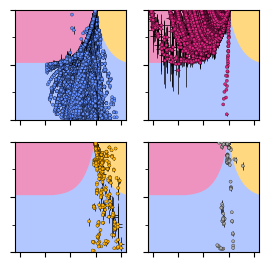

In [52]:
groups = ['#648fff','#dc267f','#ffb000','#B2A080',"#785ef0"]
f,axs = plt.subplots(2,2,figsize=(8/2.54,(8)/2.54),sharey=True,sharex=True)
straightline = np.linspace(0,1)
curvedline = np.linspace(1,20)
for i,group in enumerate(groups):

    to_plot = consistent_res_atavg[consistent_res_atavg['at avg colours'].isin([group])]
    if to_plot['at avg colours'].isin(['#B2A080',"#785ef0"]).sum() > 0:
       to_plot['at avg colours'] = 'darkgrey'
       ax = axs.flatten()[3]
    else:
        ax = axs.flatten()[i]
    ax.fill_between(straightline,straightline,1,color='#EE93BF')
    ax.fill_between(np.concat((straightline,curvedline)),-1,np.concat((straightline,1/curvedline)),color='#B2C7FF')
    ax.fill_between(curvedline,1/curvedline,1,color='#FFD880')
    ax.scatter(to_plot['E[CVx/CVy]'],to_plot['E[rhoxy]'],
                c=to_plot['at avg colours'],edgecolors='k',
                s=5,zorder=5,linewidths=0.2)
    ax.errorbar(to_plot['E[CVx/CVy]'],to_plot['E[rhoxy]'],
                 xerr=[to_plot['E[CVx/CVy]']-to_plot['2.5% (CVx/CVy)'],
                       to_plot['97.5% (CVx/CVy)']-to_plot['E[CVx/CVy]']],
                 yerr=[to_plot['E[rhoxy]']-to_plot['2.5% (rhoxy)'],
                       to_plot['97.5% (rhoxy)']-to_plot['E[rhoxy]']],
                 fmt='none',ecolor='k',elinewidth=0.5)
    ax.set_xscale('log')
    ax.set_xlim(10**-3.2,10**1.2)
    ax.set_xticks([10**-3,10**-2,10**-1,10**0,10**1])
    ax.set_xticklabels([],fontproperties=labelfont)
    if i == 0:
      ax.set_yticks([-1,0,1])
      ax.set_yticklabels([],fontproperties=labelfont)
      ax.set_yticks([-0.5,0.5],minor=True)
      ax.set_ylim(-1,1)
f.savefig('figures/ReviewerEdits/alldots_atavg_withstabilityviols.png',dpi=1200,bbox_inches='tight')

/var/folders/tm/37ds31ds14913tj9402vqksr0000gn/T/ipykernel_93811/2924738598.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_plot['at avg colours'] = 'darkgrey'


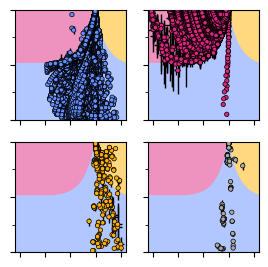

In [51]:
groups = ['#648fff','#dc267f','#ffb000','#B2A080']
f,axs = plt.subplots(2,2,figsize=(8/2.54,8/2.54),sharey=True,sharex=True)
straightline = np.linspace(0,1)
curvedline = np.linspace(1,20)
for i,ax in enumerate(axs.flatten()):
    ax.fill_between(straightline,straightline,1,color='#EE93BF')
    ax.fill_between(np.concat((straightline,curvedline)),-1,np.concat((straightline,1/curvedline)),color='#B2C7FF')
    ax.fill_between(curvedline,1/curvedline,1,color='#FFD880')
    to_plot = consistent_res_atavg[consistent_res_atavg['at avg colours'].isin([groups[i]])]
    if to_plot['at avg colours'].isin(['#B2A080',"#785ef0"]).sum() > 0:
            to_plot['at avg colours'] = 'darkgrey'
    ax.scatter(to_plot['E[CVx/CVy]'],to_plot['E[rhoxy]'],
                c=to_plot['at avg colours'],edgecolors='k',s=10,zorder=5,linewidths=0.5)
    ax.errorbar(to_plot['E[CVx/CVy]'],to_plot['E[rhoxy]'],
                 xerr=[to_plot['E[CVx/CVy]']-to_plot['2.5% (CVx/CVy)'],
                       to_plot['97.5% (CVx/CVy)']-to_plot['E[CVx/CVy]']],
                 yerr=[to_plot['E[rhoxy]']-to_plot['2.5% (rhoxy)'],
                       to_plot['97.5% (rhoxy)']-to_plot['E[rhoxy]']],
                 fmt='none',ecolor='k',elinewidth=1)
    ax.set_xscale('log')
    ax.set_xlim(10**-3.2,10**1.2)
    ax.set_xticks([10**-3,10**-2,10**-1,10**0,10**1])
    ax.set_xticklabels([],fontproperties=labelfont)
    if i == 0:
      ax.set_yticks([-1,0,1])
      ax.set_yticklabels([],fontproperties=labelfont)
      ax.set_yticks([-0.5,0.5],minor=True)
      ax.set_ylim(-1,1)

#f.savefig('figures/Dec4/alldots_atavg_withstabilityviols.png',dpi=1200,bbox_inches='tight')